# Problem Set 1: Analysis of racial disparities in felony sentencing

Group Members: Hermia Huang, Taylor Wen, Diana Wang

# 0. Load packages and imports

In [1]:
## basic functionality
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

## can add others if you need them

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## 0.1: Load the data (0 points)

Load the `sentencing_asof0405.csv` data

*Notes*: You may receive a warning about mixed data types upon import; feel free to ignore

In [3]:
df = pd.read_csv("sentencing_asof0405.csv")

/var/folders/w7/k4k3jfz96q7_tpr10dw1cs580000gn/T/ipykernel_39559/2103473006.py:1: DtypeWarning: Columns (10,11,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("sentencing_asof0405.csv")


## 0.2: Print head, dimensions, info (0 points)

In [4]:
df.head(n=10)
df.shape
df.info()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510112469,116304211997,FIRST DEGREE MURDER,2,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
1,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510213021,98265074680,HOME INVASION,14,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
2,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516447217,131972895911,FIRST DEGREE MURDER,4,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
3,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516497493,131966356472,FIRST DEGREE MURDER,5,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
4,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516648320,98059642859,HOME INVASION,13,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
5,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516648320,98059642859,HOME INVASION,13,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
6,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516698596,112267602827,ARMED ROBBERY,15,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
7,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516698596,112267602827,ARMED ROBBERY,15,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
8,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516748872,112265921257,ARMED ROBBERY,16,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
9,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide


(248146, 41)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248146 entries, 0 to 248145
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   CASE_ID                            248146 non-null  int64  
 1   CASE_PARTICIPANT_ID                248146 non-null  int64  
 2   RECEIVED_DATE                      248146 non-null  object 
 3   OFFENSE_CATEGORY                   248146 non-null  object 
 4   PRIMARY_CHARGE_FLAG                248146 non-null  bool   
 5   CHARGE_ID                          248146 non-null  int64  
 6   CHARGE_VERSION_ID                  248146 non-null  int64  
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  248146 non-null  object 
 8   CHARGE_COUNT                       248146 non-null  int64  
 9   DISPOSITION_DATE                   248146 non-null  object 
 10  DISPOSITION_CHARGED_CHAPTER        248146 non-null  object 
 11  DISPOSITION_CHARGED_ACT            2427

# Part one: data cleaning/interpretation

## 1.1: Understanding the unit of analysis (5 points)

- Print the number of unique values for the following columns. Do so in a way that avoids copying/pasting code for 
the three:

    - Cases (`CASE_ID`)
    - People in that case (`CASE_PARTICIPANT_ID`)
    - Charges (`CHARGE_ID`)

- Write a couple sentences on the following and show an example of each (e.g., a case involving multiple people):
    
    - Why there are more unique people than unique cases?
    - Why there are more unique charges than unique people?

- Print the mean and median number of charges per case/participant 

- Print the mean and median number of participants per case

- Does the data seem to enable us to follow the same defendant across different cases they're charged in? Write 1 sentence in support of your conclusion.


In [5]:
df[["CASE_ID", "CASE_PARTICIPANT_ID", "CHARGE_ID"]].nunique()

CASE_ID                197519
CASE_PARTICIPANT_ID    211977
CHARGE_ID              229015
dtype: int64

### Why there are more unique people than unique cases?
There are more unique people than unique cases because a single case might involve multiple participants. 
For instance, in the case with CASE ID 166402790922, there are two people (PARTICIPANT ID 144234439761 and 144234534133) involved.

In [6]:
df[df.CASE_ID == 166402790922][["CASE_ID", "CASE_PARTICIPANT_ID", "CHARGE_ID"]]

,CASE_ID,CASE_PARTICIPANT_ID,CHARGE_ID
92,166402790922,144234439761,61740816103
93,166402790922,144234439761,61741117758
94,166402790922,144234439761,61801599518
95,166402790922,144234439761,61801750345
96,166402790922,144234439761,61884655101
97,166402790922,144234439761,61955091465
98,166402790922,144234439761,61955292568
99,166402790922,144234439761,61955393120
100,166402790922,144234439761,61955644498
101,166402790922,144234439761,61740665276


### Why there are more unique charges than unique people?
There are more unique charges than unique people because one person can be charged with multiple offenses. 
For instance, for the person with PARTICIPANT ID 144234439761, there are 10 different charges related.

In [12]:
df[df.CASE_PARTICIPANT_ID == 144234439761][["CASE_ID", "CASE_PARTICIPANT_ID", "CHARGE_ID", "DISPOSITION_CHARGED_OFFENSE_TITLE"]]

,CASE_ID,CASE_PARTICIPANT_ID,CHARGE_ID,DISPOSITION_CHARGED_OFFENSE_TITLE
92,166402790922,144234439761,61740816103,MURDER/INTENT TO KILL/INJURE
93,166402790922,144234439761,61741117758,AGG KID/ARMED
94,166402790922,144234439761,61801599518,MURDER/STRONG PROB KILL/INJURE
95,166402790922,144234439761,61801750345,MURDER/STRONG PROB KILL/INJURE
96,166402790922,144234439761,61884655101,AGG VEHICULAR HIJACKING/DANGEROUS WEAPON
97,166402790922,144234439761,61955091465,MURDER/OTHER FORCIBLE FELONY
98,166402790922,144234439761,61955292568,MURDER/OTHER FORCIBLE FELONY
99,166402790922,144234439761,61955393120,MURDER/OTHER FORCIBLE FELONY
100,166402790922,144234439761,61955644498,AGG KID/INFLICT HARM
101,166402790922,144234439761,61740665276,MURDER/INTENT TO KILL/INJURE


In [13]:
# Charges per case
charges_per_case = df.groupby(["CASE_ID"])["CHARGE_ID"].nunique()
charges_per_case.agg(["mean", "median"])

mean      1.159458
median    1.000000
Name: CHARGE_ID, dtype: float64

In [14]:
# Charges per participant
charges_per_participant = df.groupby(["CASE_PARTICIPANT_ID"])["CHARGE_ID"].nunique()
charges_per_participant.agg(["mean", "median"])

mean      1.126146
median    1.000000
Name: CHARGE_ID, dtype: float64

In [15]:
# Print the mean and median number of participants per case
df.groupby("CASE_ID")["CASE_PARTICIPANT_ID"].nunique().agg(["mean", "median"])

mean      1.073198
median    1.000000
Name: CASE_PARTICIPANT_ID, dtype: float64

### Does the data seem to enable us to follow the same defendant across different cases they're charged in? Write 1 sentence in support of your conclusion.

No. We can not find any parcipitant ID that is associated with 2 or more cases.

In [20]:
df_defendant_across_cases = df.groupby("CASE_PARTICIPANT_ID")["CASE_ID"].nunique().reset_index()
df_defendant_across_cases.head()
df_defendant_across_cases[df_defendant_across_cases.CASE_ID > 1]

,CASE_PARTICIPANT_ID,CASE_ID
0,96757475659,1
1,97064562856,1
2,97249060542,1
3,97581722610,1
4,97603050731,1


,CASE_PARTICIPANT_ID,CASE_ID


## 1.2.1: Which offense is final? (3 points)

- First, read the data documentation [link](https://datacatalog.cookcountyil.gov/api/views/tg8v-tm6u/files/8597cdda-f7e1-44d1-b0ce-0a4e43f8c980?download=true&filename=CCSAO%20Data%20Glossary.pdf) and summarize in your own words the differences between `OFFENSE_CATEGORY` and `UPDATED_OFFENSE_CATEGORY` 

- Construct an indicator `is_changed_offense` that's True for case-participant-charge observations (rows) where there's a difference between the original charge (offense category) and the most current charge (updated offense category). What are some of the more common changed offenses? (can just print result of sort_values based on original offense category)

- Print one example of a changed offense from one of these categories and comment on what the reason may be



Answer:
OFFENSE_CATEGORY is the broad offense type before the charges are filed. 
As the case evolve, the offense category can change, and the UPDATED_OFFENSE_CATEGORY reflects the final category of the disposed charge.

In [23]:
df["is_changed_offense"] = df.OFFENSE_CATEGORY != df.UPDATED_OFFENSE_CATEGORY

# show the most common changed offenses
df[df.is_changed_offense == True]["OFFENSE_CATEGORY"].value_counts().sort_values(ascending = False)

OFFENSE_CATEGORY
PROMIS Conversion               6394
DUI                             3896
UUW - Unlawful Use of Weapon    2155
Other Offense                   2125
Aggravated Battery              1927
                                ... 
Perjury                            4
Prostitution                       3
Compelling Gang Membership         2
Benefit Recipient Fraud            2
Violate Bail Bond                  2
Name: count, Length: 88, dtype: int64

In [24]:
# show an example of changed offense
df.loc[92922][["OFFENSE_CATEGORY", "UPDATED_OFFENSE_CATEGORY", "is_changed_offense"]]

OFFENSE_CATEGORY            Home Invasion
UPDATED_OFFENSE_CATEGORY       Sex Crimes
is_changed_offense                   True
Name: 92922, dtype: object

This charge may have changed from Home Invasion to Sex Crime because, during the investigation, evidence revealed that the criminal act involved a sexual offense committed during or after the unlawful entry.

## 1.2.2: Simplifying the charges (5 points)

Using the field (`UPDATED_OFFENSE_CATEGORY`), create a new field, `simplified_offense_derived`, that simplifies the many offense categories into broader buckets using the following process:

First, combine all offenses beginning with "Aggravated" into a single category without that prefix (e.g., Aggravated Battery and Battery just becomes Battery)

Then:
- Combine all offenses with arson into a single arson category (`Arson`)
- Combine all offenses with homicide into a single homicide category (`Homicide`)
- Combine all offenses with vehicle/vehicular in the name into a single vehicle category (`Vehicle-related`)
- Combine all offenses with battery in the name into a single battery category (`Battery`)

Try to do so efficiently (e.g., using map and a dictionary or np.select rather than separate line for each recoded offense)

Print the difference between the # of unique offenses in the original `UPDATED_OFFENSE_CATEGORY` field and the # of unique offenses in your new `simplified_offense_derived` field


In [26]:
conditions = [
    df['UPDATED_OFFENSE_CATEGORY'].str.startswith('Aggravated '),
    df['UPDATED_OFFENSE_CATEGORY'].str.contains('arson', case=False),
    df['UPDATED_OFFENSE_CATEGORY'].str.contains('homicide', case=False),
    df['UPDATED_OFFENSE_CATEGORY'].str.contains('vehicle', case=False) | df['UPDATED_OFFENSE_CATEGORY'].str.contains('vehicular', case=False),
    df['UPDATED_OFFENSE_CATEGORY'].str.contains('battery', case=False)
]

choices = [
    df['UPDATED_OFFENSE_CATEGORY'].str[len('Aggravated '):],  # Remove "Aggravated" prefix
    'Arson',
    'Homicide',
    'Vehicle-related',
    'Battery'
]

df['simplified_offense_derived'] = np.select(conditions, choices, default=df['UPDATED_OFFENSE_CATEGORY'])
# df[['UPDATED_OFFENSE_CATEGORY', 'simplified_offense_derived']].sample(n = 10)

original = df['UPDATED_OFFENSE_CATEGORY'].nunique()
new = df['simplified_offense_derived'].nunique()
print(original - new)

12


## 1.3: Cleaning additional variables (10 points)

Clean the following variables; make sure to retain the original variable in data and use the derived suffix so it's easier to pull these cleaned out variables later (e.g., `age_derived`) to indicate this was a transformation

- Race: create True/false indicators for `is_black_derived` (Black only or mixed race with hispanic), Non-Black Hispanic, so either hispanic alone or white hispanic (`is_hisp_derived`), White non-hispanic (`is_white_derived`), or none of the above (`is_othereth_derived`)

- Gender: create a boolean true/false indicator for `is_male_derived` (false is female, unknown, or other)

- Age at incident: you notice outliers like 130-year olds. Winsorsize the top 0.01% of values to be equal to the 99.99th percentile value pre-winsorization. Call this `age_derived`

- Create `sentenceymd_derived` that's a version of `SENTENCING_DATE` converted to datetime format. Also create a rounded version, `sentenceym_derived`, that's rounded down to the first of the month and the year (e.g., 01-05-2016 and 01-27-2016 each become 01-01-2016)
    - Hint: all timestamps are midnight so u can strip in conversion. For full credit, before converting, you notice that some of the years have been mistranscribed (e.g., 291X or 221X instead of 201X). Programatically fix those (eg 2914 -> 2014). Even after cleaning, there will still be some that are after the year 2021 that we'll filter out later. For partial credit, you can ignore the timestamps that cause errors and set errors = "coerce" within `pd.to_datetime()` to allow the conversion to proceed. 

- Sentencing judge: create an identifier (`judgeid_derived`) for each unique judge (`SENTENCE_JUDGE`) structured as judge_1, judge_2...., with the order determined by sorting the judges (will sort on fname then last). When finding unique judges, there are various duplicates we could weed out --- for now, just focus on (1) the different iterations of Doug/Douglas Simpson, (2) the different iterations of Shelley Sutker (who appears both with her maiden name and her hyphenated married name). 
     - Hint: due to mixed types, you may need to cast the `SENTENCE_JUDGE` var to a diff type to sort

After finishing, print a random sample of 10 rows (data.sample(n = 10)) with the original and cleaned columns for the relevant variables to validate your work

In [16]:
# df.RACE.unique()

array(['Black', 'White [Hispanic or Latino]', 'White', 'HISPANIC', nan,
       'ASIAN', 'White/Black [Hispanic or Latino]', 'Asian',
       'American Indian', 'Unknown', 'Biracial'], dtype=object)

In [27]:
## Race
df["is_black_derived"]=df.RACE.str.contains("Black")
df["is_hisp_derived"]=df.RACE.isin(["HISPANIC", "White [Hispanic or Latino]"])
df["is_white_derived"]=df.RACE.isin(["White"])
df["is_othereth_derived"]=df.RACE.isin([
       'ASIAN', 'Asian',
       'American Indian', 'Unknown', 'Biracial'])|(df.RACE==np.nan)

## Gender
df["is_male_derived"] = np.where(df.GENDER == "Male", True, False)

## Age
percentile9999 = df.AGE_AT_INCIDENT.quantile(0.9999)

df["age_derived"] = np.clip(df.AGE_AT_INCIDENT, None, percentile9999)

In [31]:
## Date

def strip_time(date_str):
    if ' ' in date_str:
        space_index = date_str.index(' ')
        return date_str[:space_index]
    return date_str

df['SENTENCE_DATE_ONLY'] = df['SENTENCE_DATE'].apply(strip_time)

def fix_year(date_str):
    year = date_str[-4:]
    if (year[:2] != "20") & (year[:2] != "19"):
        corrected_year = "20" + year[2:]
        date_str = date_str[:-4] + corrected_year
    return date_str

df['SENTENCE_DATE_CLEANED'] = df['SENTENCE_DATE_ONLY'].apply(fix_year)

df["sentenceymd_derived"] = pd.to_datetime(df["SENTENCE_DATE_CLEANED"])

df['sentenceym_derived'] = df["sentenceymd_derived"].apply(lambda x: x.replace(day=1))
# df.head()

In [30]:
## Judge ID

# deal with duplicates
uniq_judgeid=df["SENTENCE_JUDGE"].astype(str, errors='ignore')
is_doug = (uniq_judgeid.str.contains("Simpson")) & (uniq_judgeid.str.contains("Doug"))
is_shelley = (uniq_judgeid.str.contains("Sutker")) & (uniq_judgeid.str.contains("Shelley"))

uniq_judgeid=np.where(is_doug,"Douglas Simpson",uniq_judgeid)
uniq_judgeid=np.where(is_shelley,"Shelly Sutker",uniq_judgeid)
df["judge_cleaned"]=uniq_judgeid

# sort by name
unique_judge=df.sort_values("judge_cleaned",ascending=True).reset_index(drop=True)["judge_cleaned"].unique()

# assign id
counter = 1

def make_dict(namelist):
    id_dict={}
    global counter
    for name in namelist:
        if name not in id_dict:
            id_dict[name] = "judge_"+str(counter)
            counter+=1
    return id_dict

id_dict=make_dict(unique_judge)

df["judgeid_derived"]=df.judge_cleaned.map(id_dict)
# df.sort_values("judge_cleaned")

In [35]:
# print related columns
derived_columns = [col for col in df.columns if col.endswith('_derived')]

df[derived_columns + ["UPDATED_OFFENSE_CATEGORY", "RACE", "GENDER", "AGE_AT_INCIDENT", "SENTENCE_DATE", "SENTENCE_JUDGE"]].sample(n = 10)

,simplified_offense_derived,is_black_derived,is_hisp_derived,is_white_derived,is_othereth_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived,UPDATED_OFFENSE_CATEGORY,RACE,GENDER,AGE_AT_INCIDENT,SENTENCE_DATE,SENTENCE_JUDGE
98190,Narcotics,True,False,False,False,True,20.0,2013-06-06,2013-06-01,judge_155,Narcotics,Black,Male,20.0,6/6/2013 12:00:00 AM,Joseph Michael Claps
118877,Armed Robbery,False,True,False,False,True,45.0,2016-11-16,2016-11-01,judge_314,Armed Robbery,White [Hispanic or Latino],Male,45.0,11/16/2016 12:00:00 AM,Timothy J Chambers
2753,PROMIS Conversion,True,False,False,False,True,30.0,2012-02-10,2012-02-01,judge_305,PROMIS Conversion,Black,Male,30.0,2/10/2012 12:00:00 AM,Thomas M Davy
68218,UUW - Unlawful Use of Weapon,True,False,False,False,True,24.0,2013-05-30,2013-05-01,judge_236,UUW - Unlawful Use of Weapon,Black,Male,24.0,5/30/2013 12:00:00 AM,Nicholas R Ford
180315,Identity Theft,True,False,False,False,True,30.0,2016-09-15,2016-09-01,judge_32,Identity Theft,Black,Male,30.0,9/15/2016 12:00:00 AM,Carol M Howard
142052,Narcotics,True,False,False,False,True,44.0,2015-01-08,2015-01-01,judge_302,Narcotics,Black,Male,44.0,1/8/2015 12:00:00 AM,Thomas J Hennelly
192245,Narcotics,True,False,False,False,True,36.0,2017-03-29,2017-03-01,judge_110,Narcotics,Black,Male,36.0,3/29/2017 12:00:00 AM,James B Linn
64246,Narcotics,True,False,False,False,True,28.0,2012-11-09,2012-11-01,judge_280,Narcotics,Black,Male,28.0,11/9/2012 12:00:00 AM,Shelley Sutker-Dermer
4562,Battery,True,False,False,False,True,19.0,2014-05-06,2014-05-01,judge_305,Domestic Battery,Black,Male,19.0,5/6/2014 12:00:00 AM,Thomas M Davy
167245,Driving With Suspended Or Revoked License,False,True,False,False,True,37.0,2016-01-06,2016-01-01,judge_246,Driving With Suspended Or Revoked License,White [Hispanic or Latino],Male,37.0,1/6/2016 12:00:00 AM,Paula M Daleo


## 1.4: Subsetting rows to analytic dataset (5 points)

You decide based on the above to simplify things in the following ways:
    
- Subset to cases where only one participant is charged, since cases with >1 participant might have complications like 
plea bargains/informing from other participants affecting the sentencing of the focal participant

- To go from a participant-case level dataset, where each participant is repeated across charges tied to the case, to a participant-level dataset, where each participant has one charge, subset to a participant's primary charge and their current sentence (`PRIMARY_CHARGE_FLAG` is True and `CURRENT_SENTENCE_FLAG` is True). Double check that this worked by confirming there are no longer multiple charges for the same case-participant

- Filter out observations where judge is nan or nonsensical (indicated by is.null or equal to FLOOD)

- Subset to sentencing date between 01-01-2012 and 04-05-2021 (inclusive)

After completing these steps, print the number of rows in the data

In [42]:
## Unique Participant Cases
participant_count = df.groupby("CASE_ID")["CASE_PARTICIPANT_ID"].nunique()
unique_participant = participant_count[participant_count == 1].index

df_unique_participant = df[df["CASE_ID"].isin(unique_participant)]
# df_unique_participant

## Unique Charge
df_unique_charge = df_unique_participant[(df_unique_participant["PRIMARY_CHARGE_FLAG"] == True) & (df_unique_participant["CURRENT_SENTENCE_FLAG"] == True)]
# df_unique_charge

# double check
case_participant_counts = df_unique_charge.groupby(["CASE_ID", "CASE_PARTICIPANT_ID"])["CHARGE_ID"].count()
case_participant_counts[case_participant_counts > 1] # no multiple charges for the same case-participant

## Filter Judges
df_filtered_judge = df_unique_charge[ (~df_unique_charge.SENTENCE_JUDGE.isnull()) & (df_unique_charge.SENTENCE_JUDGE != "FLOOD")]
# df_filtered_judge 

## Filter Date
df_filtered_final = df_filtered_judge[ (df_filtered_judge.sentenceymd_derived >= "01-01-2012") & (df_filtered_judge.sentenceymd_derived <= "04-05-2021")]
# df_filtered_final
df_filtered_final.shape[0] # number of rows: 135165

Series([], Name: CHARGE_ID, dtype: int64)

135165

# Part two: investigating Black vs. White sentencing disparities

Now that the data are cleaned, we're going to investigate different types of disparities in sentencing between Black defendants and White defendants. We're focusing on these groups for the purpose of the problem set, but the analysis could be extended to study Hispanic defendants or, in a different jurisdiction, Asian and other minoritized groups.

**Details if interested in digging deeper**: If interested (optional), you can read more technical coverage of how we might (1) measure disparities, and (2) what factors you want to adjust for when deciding whether two defendants are 'similarly situated' but for their race in the following sources:

- [Review of sentencing disparities research](https://www.journals.uchicago.edu/doi/full/10.1086/701505)
- [Discussion of causal model/blinding race at charging stage of the prosecutorial process](https://5harad.com/papers/blind-charging.pdf)
- [Discussion of measuring discrimination in policing that can generalize to the sentencing case](https://www.annualreviews.org/doi/abs/10.1146/annurev-criminol-011518-024731)
- [General discussion of causal challenges in measuring between-group disparities](https://osf.io/preprints/socarxiv/gx4y3/)

**One major caveat**: when investigating whether two similar defendants received different sentences, we're missing one important attribute that influences sentencing: the defendant's criminal history. This influences sentencing both through sentencing guidelines, which can prescribe longer sentences for those who have certain types of prior convictions, and through judicial discretion if judges are more lenient with first-time defendants. The above sources discuss how much we want to "control away" for this prior history, since if we think there are racial biases in which defendants, conditional on *committing* a crime, are arrested and charged, we may not want to adjust for that factor. More discussion [in this article](https://www.themarshallproject.org/2019/12/03/the-growing-racial-disparity-in-prison-time)


## 2.0: (0 points)

First, read in the following dataset (regardless of progress on part one): `sentencing_cleaned.pkl` (if you can't read in the pkl you can read in the .csv format but may need to recast some of the datetime columns)

*Note*: don't worry if there are slight differences in your output from Part One and this dataset/it's not a good use of time to try to reverse engineer Part One answers from this cleaned data.

In [45]:
df2 = pd.read_pickle("sentencing_cleaned.pkl")
df2.head()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,simplified_offense_derived,is_black_derived,is_hisp_derived,is_white_derived,is_other_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived
9,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,2014-10-16,2014-10-01,judge_40
16,150065796098,162105612284,8/23/1984 12:00:00 AM,PROMIS Conversion,True,50792360681,113332130159,FIRST DEGREE MURDER,1,8/6/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,30.0,2014-08-06,2014-08-01,judge_310
18,154954734978,225758446387,6/8/2001 12:00:00 AM,PROMIS Conversion,True,54885211141,174293345821,VIO BAIL BOND/CLASS 1,1,12/2/2013 12:00:00 AM,...,PROMIS Conversion,False,True,False,False,True,38.0,2013-12-02,2013-12-01,judge_162
19,155222744754,217349881776,1/31/2001 12:00:00 AM,PROMIS Conversion,True,53899906462,280120721775,POSS AMT CON SUB EXCEPT (A)/(D),1,9/10/2012 12:00:00 AM,...,Narcotics,True,False,False,False,False,33.0,2012-09-10,2012-09-01,judge_331
26,155327892699,217212381455,2/6/2001 12:00:00 AM,PROMIS Conversion,True,53938518259,164877860811,DUI LIC SUSPENDED OR REVOKED (EFFECTIVE 4-13-2...,1,9/19/2014 12:00:00 AM,...,PROMIS Conversion,False,False,True,False,True,49.0,2014-09-19,2014-09-01,judge_314


## 2.1: Investigating one type of between-group difference: who reaches the sentencing stage? (5 points)

Tabulate and visualize the proportion of defendants, out of all defendants sentenced in a given month/year, who are Black and who are White (separate proportions)

- Denominator is number of unique cases that month
- Numerator for black defendants is count of is_black_derived
- Numerator for white defendants is count of is_white_derived
- Fraction of each is numerator/denominator

- Print the table
- Create a graph with two lines--- one for Black defendants as fraction of total; another for White defendants. Make sure it includes a legend summarizing which color is for which group, and clean the legend so that it has informative names (e.g., Black or White rather than prop_black or prop_white)
- Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020? 

**Optional challenge**: improve the viz by shading the background of the visualization for months with fewer than 100 cases 

**Optional challenge**: improve the viz by adding a vertical line for 12-01-2016, the month that new State's Attorney Foxx took office 

In [46]:
# 1. Calculate the monthly proportion of Black and White defendants
prop_black = df2.groupby('sentenceym_derived')['is_black_derived'].sum()
prop_white = df2.groupby('sentenceym_derived')['is_white_derived'].sum()
denominator = df2.groupby('sentenceym_derived')['CASE_ID'].nunique()

# Calculate the fraction
prop_black_fraction = prop_black / denominator
prop_white_fraction = prop_white / denominator

# 2. Create a DataFrame 
proportions_df = pd.DataFrame({
    'prop_black': prop_black_fraction,
    'prop_white': prop_white_fraction
}).reset_index()
print(proportions_df)

    sentenceym_derived  prop_black  prop_white
0           2012-01-01    0.677419    0.144564
1           2012-02-01    0.648966    0.160690
2           2012-03-01    0.638958    0.158189
3           2012-04-01    0.696379    0.146936
4           2012-05-01    0.695146    0.144337
..                 ...         ...         ...
106         2020-11-01    0.606925    0.154786
107         2020-12-01    0.646182    0.158287
108         2021-01-01    0.621924    0.111857
109         2021-02-01    0.651731    0.134420
110         2021-03-01    0.680451    0.148496

[111 rows x 3 columns]


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Month/Year')

Text(0, 0.5, 'Proportion of Defendants')

Text(0.5, 1.0, 'Proportion of Black and White Defendants Over Time')

Text(2017-01-01 00:00:00, 0.5, "State's Attorney Foxx Takes Office")

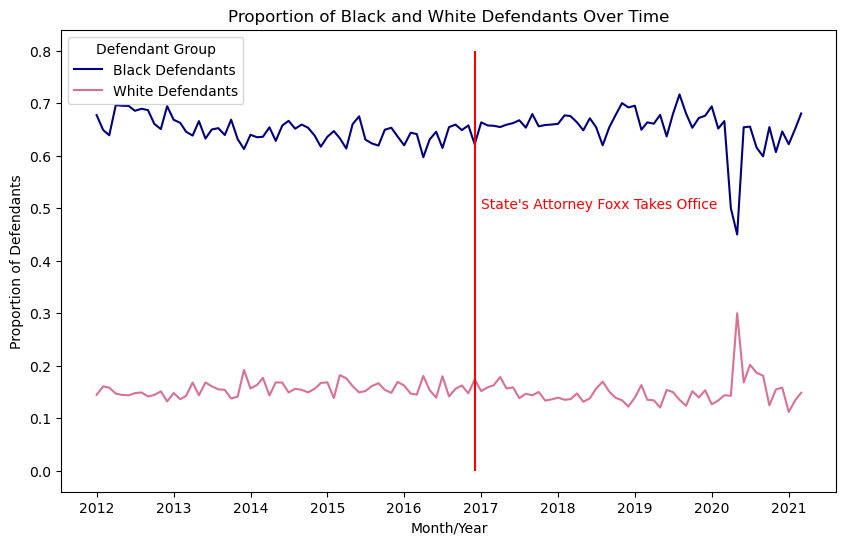

In [48]:
# 3. Data visualization
plt.figure(figsize=(10, 6))
plt.plot(proportions_df['sentenceym_derived'], proportions_df['prop_black'], label='Black Defendants', color='navy')
plt.plot(proportions_df['sentenceym_derived'], proportions_df['prop_white'], label='White Defendants', color='palevioletred')

# Make the plot prettier
plt.xlabel('Month/Year')
plt.ylabel('Proportion of Defendants')
plt.title('Proportion of Black and White Defendants Over Time')
plt.legend(title="Defendant Group")

# add vertical line
plt.vlines(pd.to_datetime('2016-12-01'), ymin=0, ymax=0.8, color='red')

plt.annotate(
    "State's Attorney Foxx Takes Office", 
    xy=(pd.to_datetime('2017-01-01'), 0.5),
    fontsize=10, 
    color='red' 
)

plt.show()

### Mathematical Equation and the Trend
$N_m$ represents total number of unique cases in month $m$.
$I(\text{is\_black\_derived})$ is the indicator function that equals 1 if the defendant in case $i$ is Black and 0 otherwise (vice versa for White defendants).

The proportion of Black defendants sentenced in month $m$ is $$ P_{\text{Black}, m} = \frac{\sum_{i=1}^{N_m} I(\text{is\_black\_derived})}{N_m} $$

The proportion of White defendants sentenced in month $m$ is$$ P_{\text{White}, m} = \frac{\sum_{i=1}^{N_m} I(\text{is\_white\_derived})}{N_m} $$

In general, the proportions of Black and White defendants sentenced each month remains quite consistent over time, with the proportion of Black defendants, $P_{\text{Black}, m}$, being notably higher. However, in April and May 2020, there is a sharp drop in the proportion of Black defendants, $P_{\text{Black}, m}$, and a spike in the proportion of White defendants, $P_{\text{White}, m}$. One reason might be the COVID-19 pandemic, which likely disrupted court proceedings and delayed cases, particularly affecting historically disadvantaged groups who were more vulnerable during this period. Additionally, the murder of George Floyd on May 25, 2020, and the subsequent protests may have influenced public awareness and reporting of racial disparities in the criminal justice system.

## 2.2: Investigating the first type of disparity: probation versus incaceration (10 points)

One type of disparity beyond who arrives at the sentencing stage is whether the defendant receives probation or incaceration.

According to the codebook, incarceration is indicated by `COMMITMENT_TYPE` == "Illinois Department of Corrections"

Recreate the previous plot but where the y axis represents the difference between the following proportions (can be either Black - White or White - Black but make sure to label), adding a smoothed line:

- Percent of black defendants who are incarcerated out of all black defendants that month/year 
- Percent of white defendants who are incarcerated out of all white defendants that month/year 

In a markdown cell after, write 1-2 sentences on your observations of trends over time. Do gaps seem to be widening or increasing?

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Month/Year')

Text(0, 0.5, 'Black - White Incarceration Proportion Difference')

Text(0.5, 1.0, 'Difference in Proportion of Black vs White Incarceration Over Time')

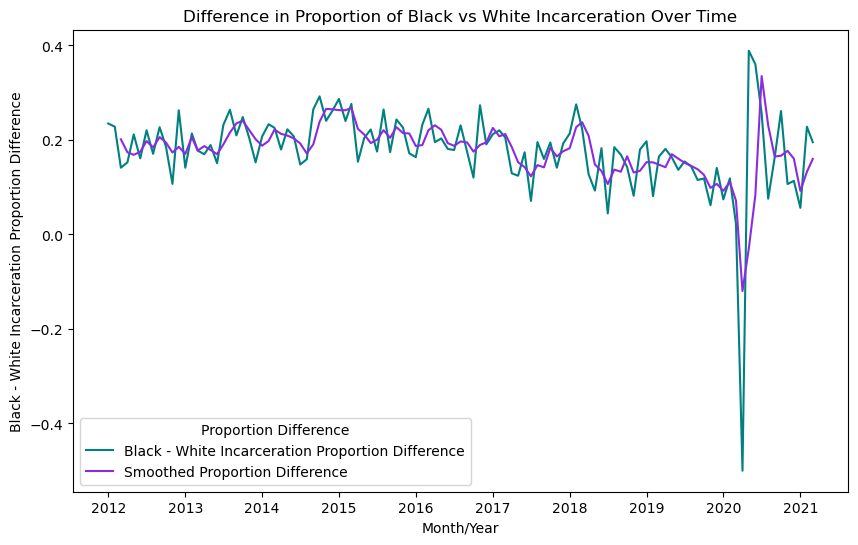

In [51]:
# 1. Find the percentages
incarcerated_black = df2[df2['COMMITMENT_TYPE'] == 'Illinois Department of Corrections'].groupby('sentenceym_derived')['is_black_derived'].sum()
incarcerated_white = df2[df2['COMMITMENT_TYPE'] == 'Illinois Department of Corrections'].groupby('sentenceym_derived')['is_white_derived'].sum()
percent_black = incarcerated_black / prop_black
percent_white = incarcerated_white / prop_white

# 2. Create a DataFrame 
proportions_diff_df = pd.DataFrame({
    'prop_black_incarcerated': percent_black,
    'prop_white_incarcerated': percent_white,
    'diff_black_white': percent_black - percent_white
}).reset_index()

proportions_diff_df['smoothed_diff'] = proportions_diff_df['diff_black_white'].rolling(window=3).mean()

# 3. Data Visualization
plt.figure(figsize=(10, 6))
plt.plot(proportions_diff_df['sentenceym_derived'], proportions_diff_df['diff_black_white'], label='Black - White Incarceration Proportion Difference', color='teal')
plt.plot(proportions_diff_df['sentenceym_derived'], proportions_diff_df['smoothed_diff'], label='Smoothed Proportion Difference', color='blueviolet')

# Make the plot prettier
plt.xlabel('Month/Year')
plt.ylabel('Black - White Incarceration Proportion Difference')
plt.title('Difference in Proportion of Black vs White Incarceration Over Time')
plt.legend(title="Proportion Difference")

plt.show()

Over time, the difference in the proportion of Black versus White defendants being incarcerated remains mostly the same, with some fluctuations. There was a notable convergence around 2020, where the gap between the two groups sharply decreased, followed by a quick rebound.

## 2.3: Investigating mechanisms: incaceration rates by charge

Your colleague sees the previous graph and is worried that the gap could be different---either wider or smaller---if you adjust for the fact that prosecutors have discretion in what crimes to charge defendants with. If white defendants are charged with crimes that tend to receive probation rather than incarceration, that could explain some of the gaps.

In the next questions, you'll begin to investigate this.

### 2.3.1: Find the most common offenses (3 points)

First, create a set of 'frequent offenses' that represent (over the entire period) the union of the 10 offenses Black defendant are most likely to be charged with and the 10 offenses white defendants are most likely to be charged with (might be far less than 20 total if there's a lot of overlap in common charges)

Use the `simplified_offense_derived` for this

In [53]:
#find the top 10 offenses for black and white defendents respectively
top10_offense_black=df2[(df2["is_black_derived"]==True)].value_counts("simplified_offense_derived")[:10].index.to_list()
top10_offense_white=df2[(df2["is_white_derived"]==True)].value_counts("simplified_offense_derived")[:10].index.to_list()

#join the two lists and remove duplicates using set() to find set of frequent offenses
unique_offenses = set(top10_offense_black + top10_offense_white)
unique_offenses

{'Battery',
 'Burglary',
 'DUI',
 'Driving With Suspended Or Revoked License',
 'Narcotics',
 'Other Offense',
 'Residential Burglary',
 'Retail Theft',
 'Robbery',
 'Theft',
 'UUW - Unlawful Use of Weapon',
 'Vehicle-related'}

### 2.3.2: Look at incarceration rates (again just whether incarcerated) by race and offense type for these top offenses (3 points)

Print a wide-format version of the resulting table (so each row is an offense type, one col is black incarceration rate for that offense type; another is the white incarceration rate) and interpret. Which offenses show the largest disparities in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation?


In [54]:
# make a filter that indicates if the defendent is incarcerated
df2["is_incarcerated"]=df2['COMMITMENT_TYPE'] == 'Illinois Department of Corrections'
is_incarcerated =df2['COMMITMENT_TYPE'] == 'Illinois Department of Corrections'

#calculate the incarceration rate by:
#1. subset the dataframe so that the offense is among the top offenses
#2. subset again by race respectively
#3. groupby offenses and calculate the mean of incarcerate rate
incarceration_rate_black_freq=df2[(df2["simplified_offense_derived"].isin(unique_offenses))&(df2["is_black_derived"]==True)].groupby("simplified_offense_derived")["is_incarcerated"].mean()
incarceration_rate_white_freq=df2[(df2["simplified_offense_derived"].isin(unique_offenses))&(df2["is_white_derived"]==True)].groupby("simplified_offense_derived")["is_incarcerated"].mean()

#create a new dataframe
freq_proportions_diff_df = pd.DataFrame({
    'incarceration_rate_black_freq': incarceration_rate_black_freq,
    'incarceration_rate_white_freq': incarceration_rate_white_freq,
}).reset_index()
freq_proportions_diff_df

,simplified_offense_derived,incarceration_rate_black_freq,incarceration_rate_white_freq
0,Battery,0.509032,0.275552
1,Burglary,0.661927,0.535763
2,DUI,0.404997,0.341855
3,Driving With Suspended Or Revoked License,0.582193,0.496552
4,Narcotics,0.537876,0.242535
5,Other Offense,0.340580,0.230228
6,Residential Burglary,0.717791,0.654114
7,Retail Theft,0.595713,0.449582
8,Robbery,0.650341,0.589286
9,Theft,0.386961,0.318721


Battery, Narcotics, and Unlawful Use of Weapon sees the highest disparity of incarceration rates of different races.

### 2.3.3: Examine whether this changes pre and post change to charging threshold for retail theft (13 points)

One important question is not only whether there are disparities by offense type but also whether these disparities are changing over time.

The SAO, for instance, announced in December of 2016 that they would no longer default to charging retail thefts of under \$1,000 as felonies. This change might have (1) decreased disparities or (2) increased disparities, depending on the correlation between race/ethnicity and magnitude of goods stolen: [news coverage](https://www.dnainfo.com/chicago/20161215/little-village/kim-foxx-raises-bar-for-retail-theft-felonies/). 

Focusing on `simplified_offense_derived` == "Retail theft." Using a function and/or loop (Dec. 2016 is always excluded as a transition month):

- Compare Black-White disparities before and after the change using a two-month bandwidth (so pre is October and November 2016; post is January and February 2017)

- Compare Black-White disparities before and after the change using a four-month bandwidth (so pre is August- November 2016; post is January - April 2017)

- Compare Black-White disparities using an eight-month bandwidth

- Compare Black-White disparities using a twelve-month bandwidth


------------------ 

- Print a table with the results (any organization is fine as long as it's clear)  

- Create a bar chart where the x axis represents different bandwidths (2, 4, etc); the y axis the size of the Black-White gap in whether the defendant receives incarceration, and for each of the x axis points, you have one shaded bar representing "before" the change, another representing "after" the change (make sure that before is ordered before after and the bandwidths are from smallest to largest)

*Note*: for each of the bandwidths include dates the entire month (e.g., for the first, include not only 02-01-2017 but everything up through 02-28-2017; easiest way is for the subsetting to use the rounded `sentenceym_derived`). Also make sure to only include white or black defendants.


**Extra credit**: because the bandwidths have different sample sizes, a better viz incorporates measures of uncertainty. Add standard errors to the estimates using the formula: $(\dfrac{p(1-p)}{n})^{0.5}$ where $p$ is the gap and $N$ is the number of cases in each bandwidth period 


In [55]:
# filter out the retail theft by different races respectively
df_tb=df_theft_black=df2[(df2['simplified_offense_derived'] == "Retail Theft") & (df2["is_black_derived"])]
df_tw=df_theft_white=df2[(df2['simplified_offense_derived'] == "Retail Theft") & (df2["is_white_derived"])]

#define a function that returns the result of the comparison, given the width
def compare_change(width):
    
    prev_start=pd.to_datetime('2016-12-1')-pd.DateOffset(months=width)
    post_end=pd.to_datetime('2016-12-1')+pd.DateOffset(months=width)
    
    mean_prev_black=df_tb[(df_tb['sentenceym_derived']<pd.to_datetime('2016-12-1')) & (df_tb['sentenceym_derived']>=prev_start)].apply("is_incarcerated").mean()
    mean_post_black=df_tb[(df_tb['sentenceym_derived']>pd.to_datetime('2016-12-1')) & (df_tb['sentenceym_derived']<=post_end)].apply("is_incarcerated").mean()
    mean_prev_white=df_tw[(df_tw['sentenceym_derived']<pd.to_datetime('2016-12-1')) & (df_tw['sentenceym_derived']>=prev_start)].apply("is_incarcerated").mean()
    mean_post_white=df_tw[(df_tw['sentenceym_derived']>pd.to_datetime('2016-12-1')) & (df_tw['sentenceym_derived']<=post_end)].apply("is_incarcerated").mean()

    comp_df = pd.DataFrame({
        'Time Period':['Pre-change','Post-change'],
        'Black Incarceration Rate': [mean_prev_black,mean_post_black],
        'White Incarceration Rate': [mean_prev_white,mean_post_white],
    })
    return comp_df

# two months bandswidth
print('Result using a two months bandswidth')
print(compare_change(2))

# four months bandswidth
print('Result using a four months bandswidth')
print(compare_change(4))

# eight months bandswidth
print('Result using a eight months bandswidth')
print(compare_change(8))

# twelve months bandswidth
print('Result using a twelve months bandswidth')
print(compare_change(12))

Result using a two months bandswidth
   Time Period  Black Incarceration Rate  White Incarceration Rate
0   Pre-change                  0.626374                  0.538462
1  Post-change                  0.372340                  0.217391
Result using a four months bandswidth
   Time Period  Black Incarceration Rate  White Incarceration Rate
0   Pre-change                  0.558511                  0.476923
1  Post-change                  0.411972                  0.330357
Result using a eight months bandswidth
   Time Period  Black Incarceration Rate  White Incarceration Rate
0   Pre-change                   0.56899                   0.43609
1  Post-change                   0.49345                   0.45000
Result using a twelve months bandswidth
   Time Period  Black Incarceration Rate  White Incarceration Rate
0   Pre-change                  0.580889                  0.419271
1  Post-change                  0.510714                  0.446009


In [56]:
# Create a DataFrame to hold the result for visualization
widths = [2, 4, 8, 12]

pre_change = [compare_change(w)['Black Incarceration Rate'][0] - compare_change(w)['White Incarceration Rate'][0] for w in widths]
post_change = [compare_change(w)['Black Incarceration Rate'][1] - compare_change(w)['White Incarceration Rate'][1] for w in widths]

df_viz = pd.DataFrame({
    'Bandwidth': widths,
    'Pre-Change Gap': pre_change,
    'Post-Change Gap': post_change
})
df_viz

,Bandwidth,Pre-Change Gap,Post-Change Gap
0,2,0.087912,0.154949
1,4,0.081588,0.081615
2,8,0.132900,0.043450
3,12,0.161618,0.064705


<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

([<matplotlib.axis.XTick at 0x2a26c79e0>,
 [Text(0, 0, '2'), Text(1, 0, '4'), Text(2, 0, '8'), Text(3, 0, '12')])

Text(0.5, 0, 'Bandwidth (Months)')

Text(0, 0.5, 'Black-White Incarceration Rate Gap')

Text(0.5, 1.0, 'Black-White Incarceration Rate Gap Before and After Retail Theft Threshold Change')

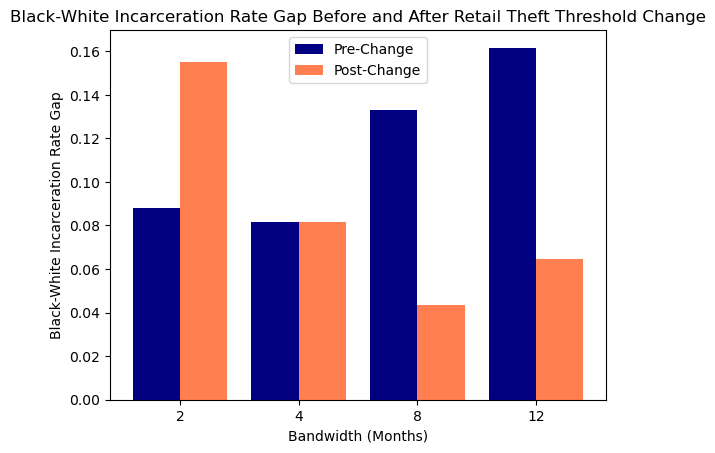

In [57]:
# Visualization
plt.bar(df_viz.index - 0.2, df_viz['Pre-Change Gap'], width=0.4, label='Pre-Change', color='navy')
plt.bar(df_viz.index + 0.2, df_viz['Post-Change Gap'], width=0.4, label='Post-Change', color='coral')

plt.xticks(df_viz.index, df_viz['Bandwidth'])

plt.xlabel('Bandwidth (Months)')
plt.ylabel('Black-White Incarceration Rate Gap')
plt.title('Black-White Incarceration Rate Gap Before and After Retail Theft Threshold Change')

plt.legend()

plt.show()

### 2.3.3.1: Interpret the results (2 points)

Write a two-sentence interpretation of the results. What might this show about how people on both sides of the issue---those who argued that the retail theft policy change would narrow disparities; those who argued that the change may widen disparities--could support their claims? 

Those who argue that the policy change widened the disparities in the Black-White defendant incarceration rate may focus on the 2-month bandwidth and argue that the post-change incarceration gap is greater than the pre-change gap in the 2-month period after the change. Those arguing the policy narrowed disparities can highlight the longer-term trends, showing that in the 8-month and 12-month bandwidths, the post-change incarceration gap becomes smaller than the pre-change gap.